In [2]:
import datetime as dt
import os
import shutil
import warnings
from collections import UserDict
from glob import glob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import Image

%matplotlib inline

pd.options.display.float_format = "{:,.2f}".format
np.set_printoptions(precision=2)
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("/kaggle/input/algeria-electric-consumption-per-capita-1971-2019/Algeria electricity consumption 1971-2019.csv")
df.head()


,Year,Electric power consumption (kWh per capita)
0,1971,133
1,1972,142
2,1973,158
3,1974,170
4,1975,195


In [4]:
df.dtypes

Year                                           int64
Electric power consumption (kWh per capita)    int64
dtype: object

In [5]:
# setting year column as index
df.set_index('Year', inplace=True)
df.head()

,Electric power consumption (kWh per capita)
Year,
1971,133
1972,142
1973,158
1974,170
1975,195


In [6]:
df.shape

(49, 1)

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

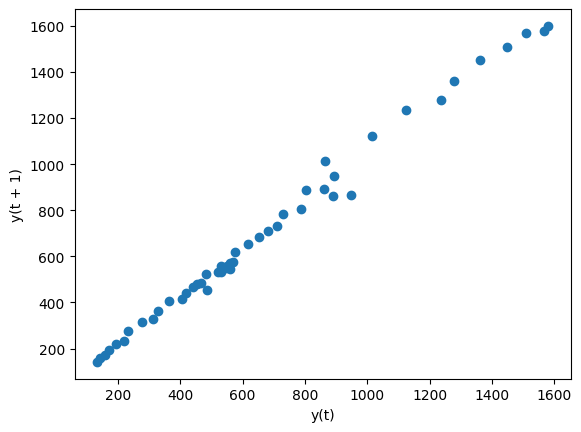

In [7]:
from pandas.plotting import lag_plot

plt.figure()

lag_plot(df)

<Axes: xlabel='y(t)', ylabel='y(t + 2)'>

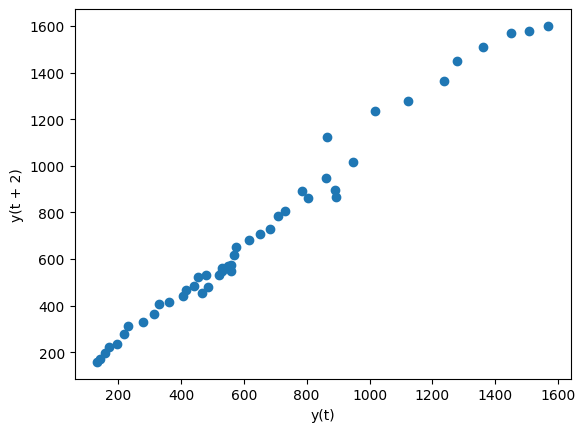

In [8]:
#Check lag=2
lag_plot(df, lag=2)


# Autocorrelation Plot Results from df dataset

### An autocorrelation plot displays the degree of correlation between a time series and its lagged values over successive time intervals. The plot's y-axis measures the autocorrelation coefficient, ranging from -1 to 1, indicating the strength and direction of the relationship. The x-axis represents the lag, showing the time steps between compared points. Spikes outside the confidence interval suggest significant autocorrelation at those lags, hinting at patterns in the time series data.

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

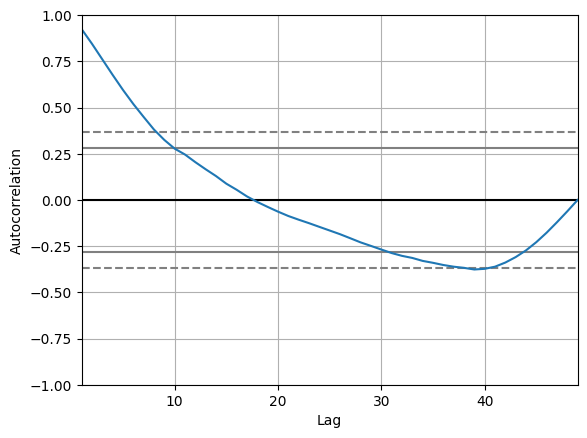

In [9]:
from pandas.plotting import autocorrelation_plot

plt.figure()

autocorrelation_plot(df)

In [10]:
df.dtypes

Electric power consumption (kWh per capita)    int64
dtype: object

## Autocorrelation function (acf) plot on ts_data_load dataset

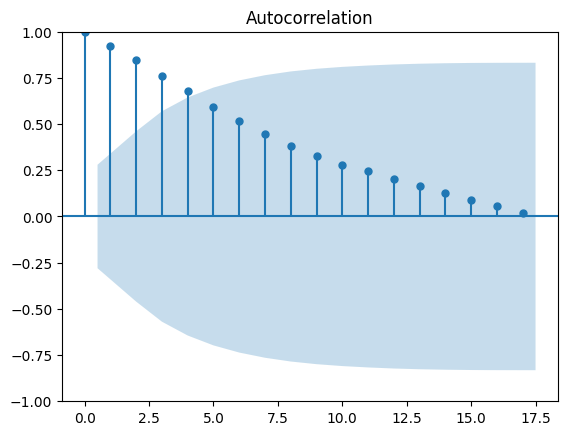

In [11]:
# When you use the plot_acf function from the statsmodels library in Python, 
#it automatically adds a confidence interval around the zero line, 
# which is typically a 95% confidence interval
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df)
pyplot.show()

**Significant Lags**: The lags where the blue dots (representing the autocorrelation coefficients) fall outside the shaded blue area (the confidence interval) can be considered significant. In this plot, the first few lags appear to be significant

**Gradual Decline**: There's a gradual decline in the autocorrelation as the lags increase, which suggests that the immediate past values have more influence on the current value than the distant past values.

**Positive Autocorrelation**: The autocorrelation coefficients are positive for the initial lags, which indicates a positive relationship between the current value and its past values at those lags.

**Decay**: After the initial lags, the autocorrelation coefficients approach zero, which suggests that the influence of past values diminishes as the lag increases.

### Partial correlation function (pacf) plot 


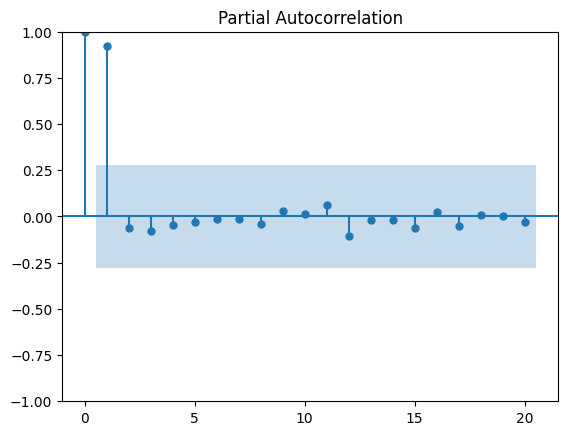

In [13]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
#The lags parameter sets the maximum number of lags to display on the plot. 
#For example, if you set lags=20, the PACF plot will show the partial autocorrelations 
#for lags 1 through 20.
plot_pacf(df, lags=20)
pyplot.show()

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
import seaborn as sns
from statsmodels.tsa.api import acf, graphics, pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

In [15]:
df.columns

Index(['Electric power consumption (kWh per capita)'], dtype='object')

In [16]:
model = AutoReg(df['Electric power consumption (kWh per capita)'], 1)
results = model.fit()
print(results.summary())

                                         AutoReg Model Results                                         
Dep. Variable:     Electric power consumption (kWh per capita)   No. Observations:                   49
Model:                                              AutoReg(1)   Log Likelihood                -239.472
Method:                                        Conditional MLE   S.D. of innovations             35.519
Date:                                         Fri, 10 Nov 2023   AIC                            484.943
Time:                                                 05:49:58   BIC                            490.557
Sample:                                                      1   HQIC                           487.065
                                                            49                                         
                                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


The results summary is from fitting an autoregressive (AR) model of order 1 (AutoReg(1)) to the time series data of "Electric power consumption (kWh per capita)." Let's break down the key information:

1. **Model Information:**
   - **Dependent Variable:** "Electric power consumption (kWh per capita)"
   - **No. Observations:** 49
   - **Model:** AutoReg(1) - Autoregressive model of order 1

2. **Coefficients:**
   - **const:** The coefficient associated with the constant term is 9.6308. This is the intercept term when lag is 0.
   - **Electric power consumption (kWh per capita).L1:** The coefficient for the lag 1 term is 1.0312. This indicates a positive relationship with the previous time period's value.

3. **Statistical Significance:**
   - **P>|z| values:** These are p-values associated with the coefficients. A p-value less than the significance level (commonly 0.05) suggests that the corresponding coefficient is statistically significant. In this case, the constant term is not statistically significant (p-value = 0.343), but the lag 1 term is highly significant (p-value < 0.0001).

4. **Model Fit:**
   - **Log Likelihood:** -239.472 - A measure of how well the model explains the variability in the data. Higher values indicate a better fit.
   - **Standard Deviation of Innovations:** 35.519 - This represents the standard deviation of the residuals (the differences between observed and predicted values).

5. **Information Criteria:**
   - **AIC (Akaike Information Criterion):** 484.943 - AIC is a measure of the model's goodness of fit, considering the trade-off between the complexity of the model and its explanatory power. Lower values indicate a better fit.
   - **BIC (Bayesian Information Criterion):** 490.557 - Similar to AIC but penalizes models with more parameters more severely.

6. **Roots:**
   - The roots of the autoregressive polynomial. In this case, there is one root at approximately 0.9697.

Overall, the model suggests that the current power consumption is positively influenced by the power consumption in the previous time period, as indicated by the significant coefficient for the lag 1 term. The model fit and goodness of fit measures provide insights into its performance.

In [23]:
res = model.fit(cov_type="HC0")
print(res.summary())

                                         AutoReg Model Results                                         
Dep. Variable:     Electric power consumption (kWh per capita)   No. Observations:                   49
Model:                                              AutoReg(1)   Log Likelihood                -239.472
Method:                                        Conditional MLE   S.D. of innovations             35.519
Date:                                         Fri, 10 Nov 2023   AIC                            484.943
Time:                                                 06:08:16   BIC                            490.557
Sample:                                                      1   HQIC                           487.065
                                                            49                                         
                                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------

In this context, specifying cov_type="HC0"  means that you are requesting the estimation of standard errors and covariance matrix using a heteroskedasticity-robust method, denoted as "HC0" (Heteroskedasticity-Consistent Covariance matrix estimator with no small sample correction).


**Covariance Type (cov_type):** In statistical modeling, the covariance matrix is a crucial component, especially when estimating parameters and conducting hypothesis tests. The "HC0" option indicates that you want to compute robust standard errors, which are less sensitive to violations of the homoskedasticity assumption.

**Heteroskedasticity-Consistent Covariance Matrix Estimator ("HC0")**: This method is designed to address situations where the variance of the errors is not constant across observations (heteroskedasticity). The standard errors and covariance matrix estimated using "HC0" are adjusted to account for potential heteroskedasticity in the data.

In [24]:
df.index

Index([1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019],
      dtype='int64', name='Year')

In [28]:
train_start_dt = 1971
test_start_dt = 2008
train = df.copy()[(df.index >= train_start_dt) & (df.index < test_start_dt)][["Electric power consumption (kWh per capita)"]]
test = df.copy()[df.index >= test_start_dt][["Electric power consumption (kWh per capita)"]]

print("Training data shape: ", train.shape)
print("Test data shape: ", test.shape)

Training data shape:  (37, 1)
Test data shape:  (12, 1)


In [29]:
#  while scaling is not a strict requirement for AR models, it might be beneficial in 
#certain situations, especially if your data violates the stationarity assumption, 
#has a large scale, or if you want more interpretable coefficients
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train["Electric power consumption (kWh per capita)"] = scaler.fit_transform(train)
train.head()

,Electric power consumption (kWh per capita)
Year,
1971,0.00
1972,0.01
1973,0.03
1974,0.05
1975,0.08


In [30]:
test["Electric power consumption (kWh per capita)"] = scaler.transform(test)
test.head()

,Electric power consumption (kWh per capita)
Year,
2008,1.07
2009,0.96
2010,1.16
2011,1.30
2012,1.45


In [40]:
HORIZON = 3
print("Forecasting horizon:", HORIZON, "years")

Forecasting horizon: 3 years


In [33]:
# changing the variable name from "Electric power consumption (kWh per capita)  to "load" 
train.columns=["load"]
test.columns=["load"]

In [37]:
# Assuming 'df' is your DataFrame with 'year' as the index
# Convert 'year' to datetime format
train.index = pd.to_datetime(train.index, format='%Y')
test.index = pd.to_datetime(test.index, format='%Y')

# Now 'year' is a DatetimeIndex

In [41]:
test_shifted = test.copy()

for t in range(1, HORIZON):
    test_shifted["load+" + str(t)] = test_shifted["load"].shift(-t)

test_shifted = test_shifted.dropna(how="any")
test_shifted.head(5)

,load,load+1,load+2
Year,,,
2008-01-01,1.07,0.96,1.16
2009-01-01,0.96,1.16,1.30
2010-01-01,1.16,1.30,1.45
2011-01-01,1.30,1.45,1.50
2012-01-01,1.45,1.50,1.61


In [42]:
%%time
training_window = 12

train_ts = train["load"]
test_ts = test_shifted

history = [x for x in train_ts]
history = history[(-training_window):]

predictions = list()

for t in range(test_ts.shape[0]):
    model = AutoReg(history, 1)
    model_fit = model.fit()
    yhat = model_fit.forecast(steps=HORIZON)
    predictions.append(yhat)
    obs = list(test_ts.iloc[t])
    history.append(obs[0])
    history.pop(0)
    print(test_ts.index[t])
    print(t + 1, ": predicted =", yhat, "expected =", obs)

2008-01-01 00:00:00
1 : predicted = [1.03 1.06 1.09] expected = [1.0696452036793693, 0.9632063074901445, 1.1603153745072272]
2009-01-01 00:00:00
2 : predicted = [1.1  1.14 1.17] expected = [0.9632063074901445, 1.1603153745072272, 1.3009198423127464]
2010-01-01 00:00:00
3 : predicted = [0.97 0.98 0.99] expected = [1.1603153745072272, 1.3009198423127464, 1.4507227332457293]
2011-01-01 00:00:00
4 : predicted = [1.17 1.18 1.18] expected = [1.3009198423127464, 1.4507227332457293, 1.5045992115637319]
2012-01-01 00:00:00
5 : predicted = [1.36 1.42 1.47] expected = [1.4507227332457293, 1.5045992115637319, 1.6149802890932983]
2013-01-01 00:00:00
6 : predicted = [1.57 1.7  1.84] expected = [1.5045992115637319, 1.6149802890932983, 1.730617608409987]
2014-01-01 00:00:00
7 : predicted = [1.59 1.68 1.77] expected = [1.6149802890932983, 1.730617608409987, 1.8081471747700395]
2015-01-01 00:00:00
8 : predicted = [1.72 1.83 1.96] expected = [1.730617608409987, 1.8081471747700395, 1.885676741130092]
2016

## ARIMA

   Year  Electric power consumption (kWh per capita)
0  1971                                          133
1  1972                                          142
2  1973                                          158
3  1974                                          170
4  1975                                          195
Year                                           int64
Electric power consumption (kWh per capita)    int64
dtype: object


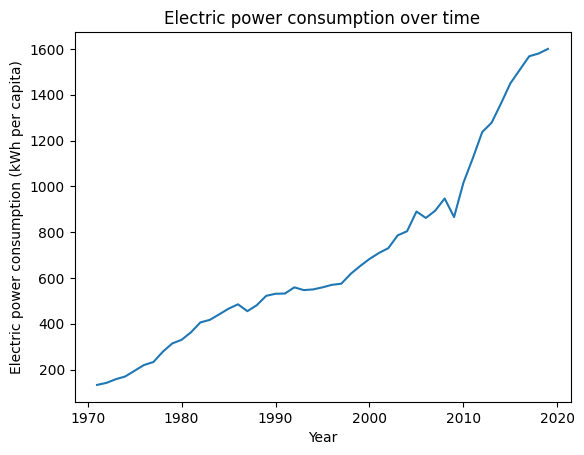

ADF Statistic: 2.339409995706415
p-value: 0.99897888008278
Critical Values: {'1%': -3.5745892596209488, '5%': -2.9239543084490744, '10%': -2.6000391840277777}


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Load the data
df = pd.read_csv("/kaggle/input/algeria-electric-consumption-per-capita-1971-2019/Algeria electricity consumption 1971-2019.csv")

# Display the first few rows of the dataframe
print(df.head())

# Check the data types and convert if necessary
print(df.dtypes)

# Ensure 'Year' column is in datetime format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Set 'Year' as the index
df.set_index('Year', inplace=True)

# Plot the time series data
plt.plot(df)
plt.title('Electric power consumption over time')
plt.xlabel('Year')
plt.ylabel('Electric power consumption (kWh per capita)')
plt.show()

# Stationarity test using Augmented Dickey-Fuller test
result = adfuller(df['Electric power consumption (kWh per capita)'], autolag='AIC')
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])



The Augmented Dickey-Fuller (ADF) test is used to check for the presence of a unit root in a univariate time series, which is an indication of non-stationarity. The test statistic is compared to critical values at different significance levels. Here's an interpretation of the results you obtained:

- **ADF Statistic (2.3394):** This is the test statistic. In order to reject the null hypothesis (that the time series has a unit root and is non-stationary), the ADF statistic should be more negative than the critical values.

- **p-value (0.9989):** This is the p-value associated with the test statistic. A high p-value suggests that we fail to reject the null hypothesis. In this case, the high p-value (close to 1) indicates that there is a high chance that the time series has a unit root and is non-stationary.

- **Critical Values:** These are the critical values at different significance levels (1%, 5%, and 10%). If the ADF statistic is less than these critical values, you would reject the null hypothesis. In your case, the ADF statistic is greater than all the critical values, further indicating non-stationarity.

Based on the ADF test results, it seems that the time series is non-stationary. To make it stationary, you might need to perform differencing

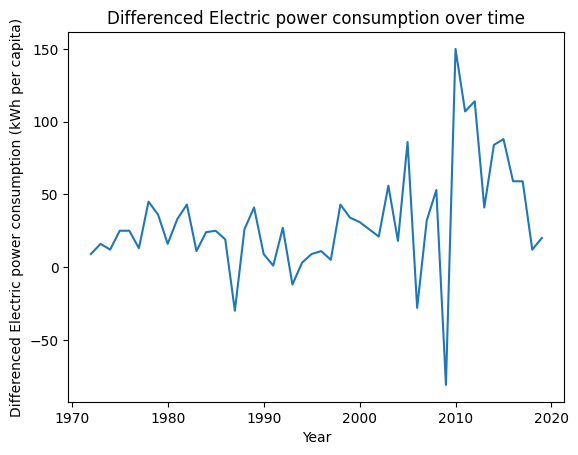

ADF Statistic (Differenced): -3.5128733662640834
p-value (Differenced): 0.007662568779953587
Critical Values (Differenced): {'1%': -3.5812576580093696, '5%': -2.9267849124681518, '10%': -2.6015409829867675}


In [2]:
# Perform differencing to make the time series stationary
df_diff = df.diff().dropna()

# Plot differenced time series
plt.plot(df_diff)
plt.title('Differenced Electric power consumption over time')
plt.xlabel('Year')
plt.ylabel('Differenced Electric power consumption (kWh per capita)')
plt.show()

# Perform the ADF test on the differenced series
result_diff = adfuller(df_diff['Electric power consumption (kWh per capita)'], autolag='AIC')
print('ADF Statistic (Differenced):', result_diff[0])
print('p-value (Differenced):', result_diff[1])
print('Critical Values (Differenced):', result_diff[4])

The critical values at 1%, 5%, and 10% significance levels represent thresholds beyond which we would reject the null hypothesis of non-stationarity. In your results:

Critical Value at 1% Significance Level: -3.5813
Critical Value at 5% Significance Level: -2.9268
Critical Value at 10% Significance Level: -2.6015

The results after differencing indicate a more promising outcome for achieving stationarity:

- **ADF Statistic (Differenced):** -3.5129: The ADF statistic for the differenced series is now more negative than the critical values at the 1%, 5%, and 10% significance levels. This suggests that we can reject the null hypothesis of a unit root, indicating that the differenced series is likely stationary.

- **p-value (Differenced):** 0.0077: The p-value associated with the ADF statistic is now less than 0.05 (assuming a significance level of 5%). This provides further evidence against the null hypothesis and supports the idea that the differenced series is stationary.

- **Critical Values (Differenced):** The ADF statistic is compared to the critical values, and in this case, it falls below the critical values at the 1%, 5%, and 10% significance levels.

The differenced series appears to be stationary based on the ADF test results. This suggests that differencing has removed the trend or unit root in the original series, making it suitable for further analysis using time series models like ARIMA. 


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


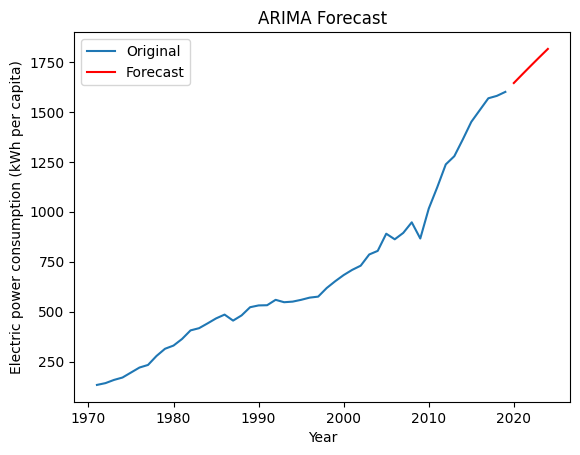

Mean Squared Error: 36003.28111340488


In [9]:


# Fit ARIMA model
p, d, q = 1, 1, 1  # You may need to adjust these parameters based on the ACF and PACF plots
model = ARIMA(df, order=(p, d, q))
fit_model = model.fit()

# Make predictions
forecast_steps = 5  # You can adjust this based on your requirements
forecast = fit_model.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(1), periods=forecast_steps, freq='Y')
forecast_values = forecast.predicted_mean.values

# Plot the original time series and the forecast
plt.plot(df.index, df['Electric power consumption (kWh per capita)'], label='Original')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
plt.title('ARIMA Forecast')
plt.xlabel('Year')
plt.ylabel('Electric power consumption (kWh per capita)')
plt.legend()
plt.show()

# Evaluate the model (optional)
mse = mean_squared_error(df[-forecast_steps:], forecast_values)
print(f'Mean Squared Error: {mse}')


In [12]:
# Calculate MAPE
def calculate_mape(actual, forecast):
    return np.mean(np.abs((actual - forecast) / actual)) * 100

# Calculate MAPE for the forecasted values
actual_values = df['Electric power consumption (kWh per capita)'][-forecast_steps:]
mape = calculate_mape(actual_values, forecast_values)

print(f'MAPE: {mape:.2f}%')



MAPE: 12.27%


# LSTMs

The input expected by LSTMs is a three-dimensional array, typically denoted as (batch_size, timesteps, features).

Here's what each dimension represents:

**Batch Size (batch_size):** It represents the number of samples in each batch of data. In training an LSTM model, the weights are updated after processing each batch of data. A larger batch size may lead to more stable updates, but it also requires more memory.

**Time Steps (timesteps):** It represents the number of time steps or observations in a sequence. For time series data, each time step corresponds to a point in time. Longer time steps allow the model to capture longer-term dependencies, but they may also increase computational complexity.

**Features (features):** It represents the number of features or variables in each time step. For univariate time series data, this is usually 1. For multivariate time series data, where you have multiple variables at each time step, the number of features is greater than 1.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import warnings
warnings.filterwarnings("ignore")


# Load the data
df = pd.read_csv("/kaggle/input/algeria-electric-consumption-per-capita-1971-2019/Algeria electricity consumption 1971-2019.csv")

# Ensure 'Year' column is in datetime format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Set 'Year' as the index
df.set_index('Year', inplace=True)

# Normalize the data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df.values.reshape(-1, 1))

# Function to create time series dataset
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Create time series dataset
look_back = 1  #  adjust this based on your requirements
X, Y = create_dataset(df_scaled, look_back)

# Reshape input to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], 1, 1))  # Adjusted for univariate time series data

# Split the data into training and testing sets
train_size = int(len(X) * 0.67)
train_X, test_X = X[:train_size], X[train_size:]
train_Y, test_Y = Y[:train_size], Y[train_size:]

# Define the LSTM model
def create_lstm_model(look_back=1, neurons=50):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(1, look_back)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a KerasRegressor for use in scikit-learn
epochs = 100
batch_size = 1
lstm_model = tf.keras.wrappers.scikit_learn.KerasRegressor(build_fn=create_lstm_model, epochs=epochs, batch_size=batch_size, verbose=2)

# Define hyperparameters to tune
param_grid = {
    'look_back': [1, 2, 3],  # adjust as needed
    'neurons': [25, 50, 75]   # adjust as needed
}

# Use GridSearchCV to perform hyperparameter tuning
grid = GridSearchCV(estimator=lstm_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_result = grid.fit(train_X, train_Y)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# Get the best model
best_model = grid_result.best_estimator_

# Make predictions
train_predict = best_model.predict(train_X)
test_predict = best_model.predict(test_X)

# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
train_Y = scaler.inverse_transform([train_Y])
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))
test_Y = scaler.inverse_transform([test_Y])

# Calculate MAPE and MSE
mape_train = np.mean(np.abs((train_Y - train_predict) / train_Y)) * 100
mape_test = np.mean(np.abs((test_Y - test_predict) / test_Y)) * 100

mse_train = mean_squared_error(train_Y.flatten(), train_predict.flatten())
mse_test = mean_squared_error(test_Y.flatten(), test_predict.flatten())

print(f'Training MAPE: {mape_train:.2f}%')
print(f'Testing MAPE: {mape_test:.2f}%')
print(f'Training Mean Squared Error: {mse_train:.2f}')
print(f'Testing Mean Squared Error: {mse_test:.2f}')


Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
22/22 - 3s - loss: 0.0261 - 3s/epoch - 129ms/step
Epoch 2/100
21/21 - 3s - loss: 0.0774 - 3s/epoch - 135ms/step
Epoch 2/100
22/22 - 0s - loss: 0.0151 - 64ms/epoch - 3ms/step
Epoch 3/100
21/21 - 3s - loss: 0.0594 - 3s/epoch - 137ms/step
Epoch 2/100
21/21 - 0s - loss: 0.0465 - 65ms/epoch - 3ms/step
Epoch 3/100
21/21 - 3s - loss: 0.0557 - 3s/epoch - 138ms/step
Epoch 2/100
22/22 - 0s - loss: 0.0087 - 66ms/epoch - 3ms/step
Epoch 4/100
21/21 - 0s - loss: 0.0256 - 67ms/epoch - 3ms/step
Epoch 3/100
21/21 - 0s - loss: 0.0240 - 66ms/epoch - 3ms/step
Epoch 4/100
21/21 - 0s - loss: 0.0387 - 67ms/epoch - 3ms/step
Epoch 3/100
22/22 - 0s - loss: 0.0067 - 70ms/epoch - 3ms/step
Epoch 5/100
21/21 - 0s - loss: 0.0077 - 72ms/epoch - 3ms/step
Epoch 4/100
21/21 - 0s - loss: 0.0114 - 72ms/epoch - 3ms/step
Epoch 5/100
21/21 - 0s - loss: 0.0288 - 71ms/epoch - 3ms/step
Epoch 4/100
22/22 - 0s - loss: 0.0061 - 68ms/epoch - 3ms/step
Epoch 6/100
21/21 - 0s - loss: 0.0